### File Explanation

**attentionMechanism.ipynb:**
<br> This notebook is to load attention mechanism data for AddNeuroMed from 'attentionMechanism.pickle' and obtain attention matrix for gene A and gene B 

**Processes are as follows:**
<br> 1) Load all variables from 'attentionMechanism.pickle'
<br> 2) Create attention matrix dataframes (DF) for gene A and gene B for selected +1, -1 and 0 labelled examples 
<br> 3) Plot attention matrices (function: **plot_attention_matrix** in **attention_mechanism_utils.py**)
<br> 4) Create SNP count DF to keep track of counts of encodings 1, 2, and 3 at every time step for a specific example (DF: **snpsDataA, snpsDataB**, dictionary,  
            (keys: examples,
             values: a Pandas table where rows: time_steps, columns: Count 1, Count 2, Count 3)
<br> 5) Generate gene expression DF (rows: time_steps, 
                                            columns: {Gene A-max, Gene B-max, 
                                                      Gene A-mean, Gene B-mean, 
                                                      Gene A-min, Gene B-min})

In [3]:
# Save data into Python friendly file
import pickle
import numpy as np
import pandas as pd
with open('attentionMechanism.pickle', 'rb') as f:
    rSnpA_tst_nXNS = pickle.load( f )
    rSnpB_tst_nXNS = pickle.load( f )
    attention_matrixA = pickle.load( f )
    attention_matrixB = pickle.load( f )
    print( 'Data loaded.' )

Data loaded.


In [7]:
# Attention Mechanism Evaluation
## Those selected examples are chosen for the assessment 
attentionLabel_0 = [9]
attentionLabel_1 = [25]
attentionLabel_2 = [32]

attentionWeights_A = np.array( [attention_matrixA[iX] for iX in range(rSnpA_tst_nXNS.shape[0])])
attentionWeights_B = np.array( [attention_matrixB[iX] for iX in range(rSnpB_tst_nXNS.shape[0])])

## Attention DataFrame
attentionWeightDF_A = pd.DataFrame(data=np.reshape(attentionWeights_A, 
                                                     (len(attentionWeights_A), 
                                                      rSnpA_tst_nXNS.shape[1])).transpose())
attentionWeightDF_B = pd.DataFrame(data=np.reshape(attentionWeights_B, 
                                                     (len(attentionWeights_B), 
                                                      rSnpA_tst_nXNS.shape[1])).transpose() )

## +1 predictions (labelled as 0 in the network)
attentionWeightDF_A_0 = pd.DataFrame(data=np.reshape(attentionWeights_A[attentionLabel_0], 
                                                     (len(attentionLabel_0), 
                                                      rSnpA_tst_nXNS.shape[1])).transpose())
attentionWeightDF_B_0 = pd.DataFrame(data=np.reshape(attentionWeights_B[attentionLabel_0], 
                                                     (len(attentionLabel_0), 
                                                      rSnpB_tst_nXNS.shape[1])).transpose() )

## -1 predictions (labelled as 1 in the network)
attentionWeightDF_A_1 = pd.DataFrame(data=np.reshape(attentionWeights_A[attentionLabel_1], 
                                                     (len(attentionLabel_1), 
                                                      rSnpA_tst_nXNS.shape[1])).transpose() )
attentionWeightDF_B_1 = pd.DataFrame(data=np.reshape(attentionWeights_B[attentionLabel_1], 
                                                     (len(attentionLabel_1), 
                                                      rSnpB_tst_nXNS.shape[1])).transpose() )

## 0 predictions (labelled as 2 in the network )
attentionWeightDF_A_2 = pd.DataFrame(data=np.reshape(attentionWeights_A[attentionLabel_2], 
                                                     (len(attentionLabel_2), 
                                                      rSnpA_tst_nXNS.shape[1])).transpose() )
attentionWeightDF_B_2 = pd.DataFrame(data=np.reshape(attentionWeights_B[attentionLabel_2], 
                                                     (len(attentionLabel_2), 
                                                      rSnpB_tst_nXNS.shape[1])).transpose() )

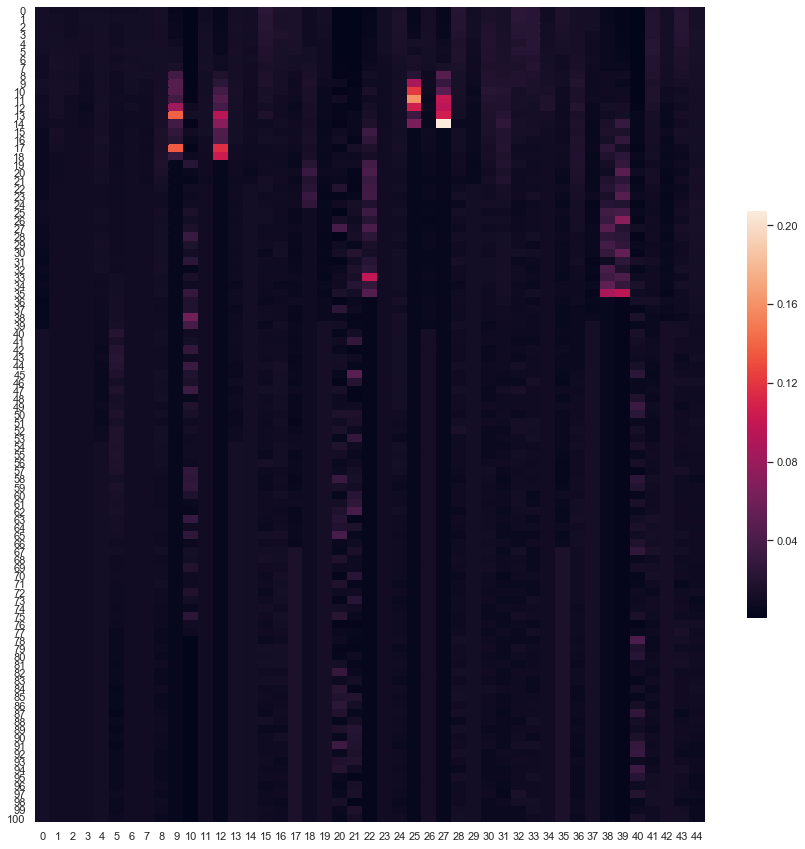

In [10]:
%run attention_mechanism_utils.py
## Attention matrix for gene A
plot_attention_matrix(attentionWeightDF_A, (15,15), True)

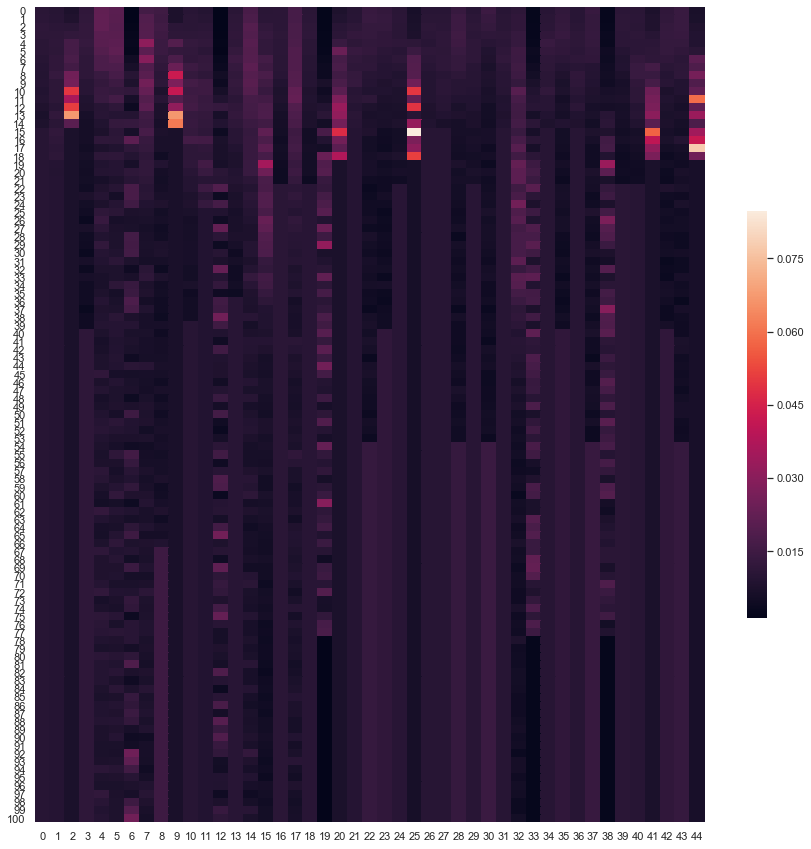

In [13]:
%run attention_mechanism_utils.py
## Attention matrix for gene B
plot_attention_matrix(attentionWeightDF_B, (15,15), True)

In [17]:
# Construct SNPs dictionary for samples
subjects = list(range(0,206))
snpsDataA = {}
snpsDataB = {}

for iA in range(45):
    dataA_ = pd.DataFrame(data = rSnpA_tst_nXNS[iA])
    dataB_ = pd.DataFrame(data = rSnpB_tst_nXNS[iA])

    dataA_['Count 1'] = dataA_[dataA_[subjects] == 1].count(axis=1)
    dataA_['Count 2'] = dataA_[dataA_[subjects] == 2].count(axis=1)
    dataA_['Count 3'] = dataA_[dataA_[subjects] == 3].count(axis=1)

    dataB_['Count 1'] = dataB_[dataB_[subjects] == 1].count(axis=1)
    dataB_['Count 2'] = dataB_[dataB_[subjects] == 2].count(axis=1)
    dataB_['Count 3'] = dataB_[dataB_[subjects] == 3].count(axis=1)

    dataA_ = dataA_[['Count 1', 'Count 2', 'Count 3']]
    dataB_ = dataB_[['Count 1', 'Count 2', 'Count 3']]
    
    snpsDataA[iA] = dataA_
    snpsDataB[iA] = dataB_
    
# Construct gene expression data frame for samples
geneExpressionA = np.array( [rSnpA_tst_nXNS[i][0].max() for i in range(45)] )
geneExpressionB = np.array( [rSnpB_tst_nXNS[i][0].max() for i in range(45)] )
geneExpressionA_1 = np.array( [rSnpA_tst_nXNS[i][0].mean() for i in range(45)] )
geneExpressionB_1 = np.array( [rSnpB_tst_nXNS[i][0].mean() for i in range(45)] )
geneExpressionA_2 = np.array( [rSnpA_tst_nXNS[i][0].min() for i in range(45)] )
geneExpressionB_2 = np.array( [rSnpB_tst_nXNS[i][0].min() for i in range(45)] )

geneExpression = pd.DataFrame({'Gene A - max': geneExpressionA, 'Gene B - max': geneExpressionB,
                               'Gene A - mean': geneExpressionA_1, 'Gene B - mean': geneExpressionB_1,
                               'Gene A - min': geneExpressionA_2, 'Gene B - min': geneExpressionB_2})

In [20]:
snpsDataA[9][8:19]

,Count 1,Count 2,Count 3
8,58,92,56
9,6,72,128
10,0,0,206
11,0,1,205
12,0,0,206
13,0,1,205
14,6,73,127
15,23,84,99
16,0,1,205
17,0,0,206


In [21]:
snpsDataB[9][8:19]

,Count 1,Count 2,Count 3
8,1,19,186
9,3,21,182
10,0,0,206
11,1,4,201
12,0,2,204
13,9,77,120
14,9,76,121
15,0,0,0
16,0,0,0
17,0,0,0


In [18]:
geneExpression.iloc[[9,25,32]]

,Gene A - max,Gene B - max,Gene A - mean,Gene B - mean,Gene A - min,Gene B - min
9,2.572461,2.606738,0.071207,-0.089090,-3.334071,-2.964612
25,2.606738,2.572461,-0.089090,0.071207,-2.964612,-3.334071
32,2.945235,2.399947,0.020163,0.016875,-4.114111,-2.590793
